In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

%matplotlib inline

In [302]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams["figure.figsize"] = (11, 6.5)

In [150]:
data = pd.read_csv("DATA/kniga_data.csv", delimiter=';', encoding = 'cp1251')
data.head()

,Unnamed: 0,Ф.И.О.,год рождения (возраст),ИМТ,перелом лучевой кости,перелом позвоночника (уровень),перелом бедра,ДДЗП,о/хондроз,ДОА,...,ФВ 45-50%,ФВ 35-45%,ФВ 25-35%,ИММЛЖ,ПароксизмФП,ФВ,ФЗ низкая,ФЗ ниже средней,ФН средняя,ФН высокая
0,1.0,Завьялова Нина Ивановна,78,"33,3",0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,NaN,0.0,66,0.0,0.0,1.0,0.0
1,2.0,Пермякова Лидия Максимовна,80,"35,4",1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,NaN,0.0,56,0.0,1.0,0.0,0.0
2,3.0,Чистякова Валентина Ивановна,65,19,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,NaN,0.0,69,0.0,0.0,0.0,1.0
3,4.0,Гуленкова Алевтина Федоровна,75,"34,5",0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,NaN,0.0,66,0.0,0.0,1.0,0.0
4,5.0,Лужковская Марина Якубовна,76,"20,1",1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,65,0.0,0.0,1.0,0.0


In [151]:
df = data[0:71].copy()
df.tail()

,Unnamed: 0,Ф.И.О.,год рождения (возраст),ИМТ,перелом лучевой кости,перелом позвоночника (уровень),перелом бедра,ДДЗП,о/хондроз,ДОА,...,ФВ 45-50%,ФВ 35-45%,ФВ 25-35%,ИММЛЖ,ПароксизмФП,ФВ,ФЗ низкая,ФЗ ниже средней,ФН средняя,ФН высокая
66,NaN,Богданович Лидия Ивановна,70,"31,5",0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,67,0.0,0.0,1.0,0.0
67,NaN,Ливадная Светлана Григорьевна,77,"29,1",0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,NaN,0.0,58,0.0,1.0,0.0,0.0
68,NaN,Чиркина Раиса Семеновна,67,"25,7",0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,NaN,0.0,59,0.0,1.0,0.0,0.0
69,NaN,Шаробуева Диана Сергеевна,67,27,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,69,0.0,0.0,0.0,1.0
70,NaN,Петрова Ольга Петровна,72,28,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,NaN,0.0,30,1.0,0.0,0.0,0.0


In [152]:
df.describe()

,Unnamed: 0,перелом лучевой кости,перелом позвоночника (уровень),перелом бедра,ДДЗП,о/хондроз,ДОА,ЭКГ (ГЛЖ),ЭКГ (Нарушение реполяризации),БЛНПГ,...,ФВ более55%,ФВ 45-50%,ФВ 35-45%,ФВ 25-35%,ИММЛЖ,ПароксизмФП,ФЗ низкая,ФЗ ниже средней,ФН средняя,ФН высокая
count,58.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,71.000000,71.000000,71.000000,71.000000,0.0,71.000000,71.000000,71.000000,71.000000,71.000000
mean,29.500000,0.267606,0.366197,0.112676,0.760563,0.760563,0.380282,0.661972,0.704225,0.366197,...,0.718310,0.140845,0.084507,0.056338,NaN,0.056338,0.154930,0.253521,0.450704,0.140845
std,16.886879,0.445862,0.485193,0.318447,0.429777,0.429777,0.488911,0.476405,0.459639,0.485193,...,0.453025,0.350338,0.280126,0.232214,NaN,0.232214,0.364413,0.438123,0.501105,0.350338
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.250000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.750000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.500000,1.000000,0.000000
max,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
df.isna().sum()

Unnamed: 0                         13
Ф.И.О.                              0
год рождения (возраст)              0
ИМТ                                 0
перелом лучевой кости               0
 перелом позвоночника (уровень)     0
 перелом бедра                      0
ДДЗП                                0
о/хондроз                           0
ДОА                                 0
индекс коморбидности                0
индекс CIRS                         0
общий белок, г/л                    0
СКФ, мл/мин                         0
Глюкоза                             0
Мочевина                            0
Креатинин                           0
Холестерин общий                    0
Са общ.                             0
Са ион.                             0
Р                                   0
ЩФ                                  0
СL                                  0
Са мочи                             0
Креатинин мочи                      0
HbA1C                               0
ТТГ         

In [154]:
df = df.drop(columns = ['ИММЛЖ', 'Ф.И.О.'], axis = 1).copy()
df.head()

,Unnamed: 0,год рождения (возраст),ИМТ,перелом лучевой кости,перелом позвоночника (уровень),перелом бедра,ДДЗП,о/хондроз,ДОА,индекс коморбидности,...,ФВ более55%,ФВ 45-50%,ФВ 35-45%,ФВ 25-35%,ПароксизмФП,ФВ,ФЗ низкая,ФЗ ниже средней,ФН средняя,ФН высокая
0,1.0,78,"33,3",0.0,0.0,0.0,1.0,1.0,0.0,7,...,0.0,1.0,0.0,0.0,0.0,66,0.0,0.0,1.0,0.0
1,2.0,80,"35,4",1.0,0.0,0.0,1.0,1.0,0.0,6,...,0.0,0.0,0.0,1.0,0.0,56,0.0,1.0,0.0,0.0
2,3.0,65,19,1.0,0.0,0.0,1.0,1.0,1.0,7,...,1.0,0.0,0.0,0.0,0.0,69,0.0,0.0,0.0,1.0
3,4.0,75,"34,5",0.0,1.0,0.0,1.0,1.0,1.0,8,...,1.0,0.0,0.0,0.0,0.0,66,0.0,0.0,1.0,0.0
4,5.0,76,"20,1",1.0,0.0,0.0,0.0,0.0,0.0,7,...,1.0,0.0,0.0,0.0,0.0,65,0.0,0.0,1.0,0.0


In [257]:
for s in df.columns:
    df[s] = df[s].astype(str).str.replace('%', '').copy()
    df[s] = df[s].astype(str).str.replace(',', '.').astype(float).copy()
# df['ИМТ'] = df['ИМТ'].replace(',', '.').copy()
# df.ПГ.head()
df.head()

,uid,год рождения (возраст),ИМТ,перелом лучевой кости,перелом позвоночника (уровень),перелом бедра,ДДЗП,о/хондроз,ДОА,индекс коморбидности,...,ФВ 45-50%,ФВ 35-45%,ФВ 25-35%,ПароксизмФП,ФВ,ФЗ низкая,ФЗ ниже средней,ФН средняя,ФН высокая,y
0,1.0,78.0,33.3,0.0,0.0,0.0,1.0,1.0,0.0,7.0,...,1.0,0.0,0.0,0.0,66.0,0.0,0.0,1.0,0.0,0.0
1,2.0,80.0,35.4,1.0,0.0,0.0,1.0,1.0,0.0,6.0,...,0.0,0.0,1.0,0.0,56.0,0.0,1.0,0.0,0.0,1.0
2,3.0,65.0,19.0,1.0,0.0,0.0,1.0,1.0,1.0,7.0,...,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,1.0,1.0
3,4.0,75.0,34.5,0.0,1.0,0.0,1.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,66.0,0.0,0.0,1.0,0.0,1.0
4,5.0,76.0,20.1,1.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,65.0,0.0,0.0,1.0,0.0,1.0


In [258]:
df.describe()

,uid,год рождения (возраст),ИМТ,перелом лучевой кости,перелом позвоночника (уровень),перелом бедра,ДДЗП,о/хондроз,ДОА,индекс коморбидности,...,ФВ 45-50%,ФВ 35-45%,ФВ 25-35%,ПароксизмФП,ФВ,ФЗ низкая,ФЗ ниже средней,ФН средняя,ФН высокая,y
count,58.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,29.500000,75.760563,27.293099,0.267606,0.366197,0.112676,0.760563,0.760563,0.380282,7.028169,...,0.140845,0.084507,0.056338,0.056338,58.000000,0.154930,0.253521,0.450704,0.140845,0.605634
std,16.886879,6.492776,4.443713,0.445862,0.485193,0.318447,0.429777,0.429777,0.488911,1.182876,...,0.350338,0.280126,0.232214,0.232214,10.972693,0.364413,0.438123,0.501105,0.350338,0.492193
min,1.000000,60.000000,16.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.250000,70.500000,24.400000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.500000,77.000000,27.200000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,43.750000,80.000000,30.300000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,0.500000,1.000000,0.000000,1.000000
max,58.000000,86.000000,37.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [259]:
df = df.rename(columns = {
    'Unnamed: 0': 'uid'
})
df.head()

,uid,год рождения (возраст),ИМТ,перелом лучевой кости,перелом позвоночника (уровень),перелом бедра,ДДЗП,о/хондроз,ДОА,индекс коморбидности,...,ФВ 45-50%,ФВ 35-45%,ФВ 25-35%,ПароксизмФП,ФВ,ФЗ низкая,ФЗ ниже средней,ФН средняя,ФН высокая,y
0,1.0,78.0,33.3,0.0,0.0,0.0,1.0,1.0,0.0,7.0,...,1.0,0.0,0.0,0.0,66.0,0.0,0.0,1.0,0.0,0.0
1,2.0,80.0,35.4,1.0,0.0,0.0,1.0,1.0,0.0,6.0,...,0.0,0.0,1.0,0.0,56.0,0.0,1.0,0.0,0.0,1.0
2,3.0,65.0,19.0,1.0,0.0,0.0,1.0,1.0,1.0,7.0,...,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,1.0,1.0
3,4.0,75.0,34.5,0.0,1.0,0.0,1.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,66.0,0.0,0.0,1.0,0.0,1.0
4,5.0,76.0,20.1,1.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,65.0,0.0,0.0,1.0,0.0,1.0


In [78]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [260]:
df = df.fillna(0).copy()

In [261]:
df.isna().sum()

uid                                0
год рождения (возраст)             0
ИМТ                                0
перелом лучевой кости              0
 перелом позвоночника (уровень)    0
 перелом бедра                     0
ДДЗП                               0
о/хондроз                          0
ДОА                                0
индекс коморбидности               0
индекс CIRS                        0
общий белок, г/л                   0
СКФ, мл/мин                        0
Глюкоза                            0
Мочевина                           0
Креатинин                          0
Холестерин общий                   0
Са общ.                            0
Са ион.                            0
Р                                  0
ЩФ                                 0
СL                                 0
Са мочи                            0
Креатинин мочи                     0
HbA1C                              0
ТТГ                                0
ПГ                                 0
Т

In [367]:
df = df.fillna(0).copy()
df['y'] = df['перелом лучевой кости'].astype(float) + df[' перелом позвоночника (уровень)'].astype(float) + \
    df[' перелом бедра'].astype(float)
df['y'] = df.y.astype(bool).astype(int).copy()
X = df.drop(['перелом лучевой кости', ' перелом позвоночника (уровень)', ' перелом бедра', 'y', 'uid'], axis = 1)
#X = df.iloc[:,9:-1]
y = df.y
display(X.head())
display(y.head())
y.describe()

,год рождения (возраст),ИМТ,ДДЗП,о/хондроз,ДОА,индекс коморбидности,индекс CIRS,"общий белок, г/л","СКФ, мл/мин",Глюкоза,...,ФВ более55%,ФВ 45-50%,ФВ 35-45%,ФВ 25-35%,ПароксизмФП,ФВ,ФЗ низкая,ФЗ ниже средней,ФН средняя,ФН высокая
0,78.0,33.3,1.0,1.0,0.0,7.0,14.0,63.0,66.7,5.5,...,0.0,1.0,0.0,0.0,0.0,66.0,0.0,0.0,1.0,0.0
1,80.0,35.4,1.0,1.0,0.0,6.0,15.0,65.0,66.8,5.7,...,0.0,0.0,0.0,1.0,0.0,56.0,0.0,1.0,0.0,0.0
2,65.0,19.0,1.0,1.0,1.0,7.0,9.0,76.0,52.6,5.1,...,1.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,1.0
3,75.0,34.5,1.0,1.0,1.0,8.0,10.0,69.0,72.5,5.1,...,1.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,1.0,0.0
4,76.0,20.1,0.0,0.0,0.0,7.0,12.0,69.0,36.3,5.5,...,1.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,1.0,0.0


0    0
1    1
2    1
3    1
4    1
Name: y, dtype: int32

count    71.000000
mean      0.605634
std       0.492193
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: y, dtype: float64

In [263]:
print(y.isna().sum(), end = '\n \n')
print(X.isna().sum())
X.describe()

0
 
год рождения (возраст)           0
ИМТ                              0
ДДЗП                             0
о/хондроз                        0
ДОА                              0
индекс коморбидности             0
индекс CIRS                      0
общий белок, г/л                 0
СКФ, мл/мин                      0
Глюкоза                          0
Мочевина                         0
Креатинин                        0
Холестерин общий                 0
Са общ.                          0
Са ион.                          0
Р                                0
ЩФ                               0
СL                               0
Са мочи                          0
Креатинин мочи                   0
HbA1C                            0
ТТГ                              0
ПГ                               0
Т критерии: позвоночник          0
Бедро®                           0
 Бедро(L)                        0
ЭКГ (ГЛЖ)                        0
ЭКГ (Нарушение реполяризации)    0
БЛНПГ           

,год рождения (возраст),ИМТ,ДДЗП,о/хондроз,ДОА,индекс коморбидности,индекс CIRS,"общий белок, г/л","СКФ, мл/мин",Глюкоза,...,ФВ более55%,ФВ 45-50%,ФВ 35-45%,ФВ 25-35%,ПароксизмФП,ФВ,ФЗ низкая,ФЗ ниже средней,ФН средняя,ФН высокая
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,75.760563,27.293099,0.760563,0.760563,0.380282,7.028169,12.647887,68.816901,57.159155,5.571831,...,0.718310,0.140845,0.084507,0.056338,0.056338,58.000000,0.154930,0.253521,0.450704,0.140845
std,6.492776,4.443713,0.429777,0.429777,0.488911,1.182876,2.022012,6.227382,13.060120,0.709966,...,0.453025,0.350338,0.280126,0.232214,0.232214,10.972693,0.364413,0.438123,0.501105,0.350338
min,60.000000,16.600000,0.000000,0.000000,0.000000,4.000000,8.000000,59.000000,36.300000,4.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000
25%,70.500000,24.400000,1.000000,1.000000,0.000000,6.000000,12.000000,65.000000,47.850000,5.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000
50%,77.000000,27.200000,1.000000,1.000000,0.000000,7.000000,13.000000,68.000000,54.200000,5.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,30.300000,1.000000,1.000000,1.000000,8.000000,14.000000,72.000000,66.000000,5.950000,...,1.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,0.500000,1.000000,0.000000
max,86.000000,37.500000,1.000000,1.000000,1.000000,9.000000,18.000000,87.000000,98.000000,7.700000,...,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000


### Вариант с использованием классической модели машинного обучения

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
dt = RandomForestClassifier(random_state=42)
parametrs = {'criterion': ['entropy'],
             'n_estimators': range(10, 51, 10),
             'max_depth': range(1, 13, 1),
             'min_samples_split': range(2, 10, 2),
             'min_samples_leaf': range(1, 8)}
search = GridSearchCV(dt, parametrs, cv = 3, n_jobs=-1)
search.fit(X_train, y_train)
search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=6,
                       n_estimators=40, random_state=42)

In [286]:
search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 40}

In [287]:
best_tree = search.best_estimator_

<AxesSubplot:>

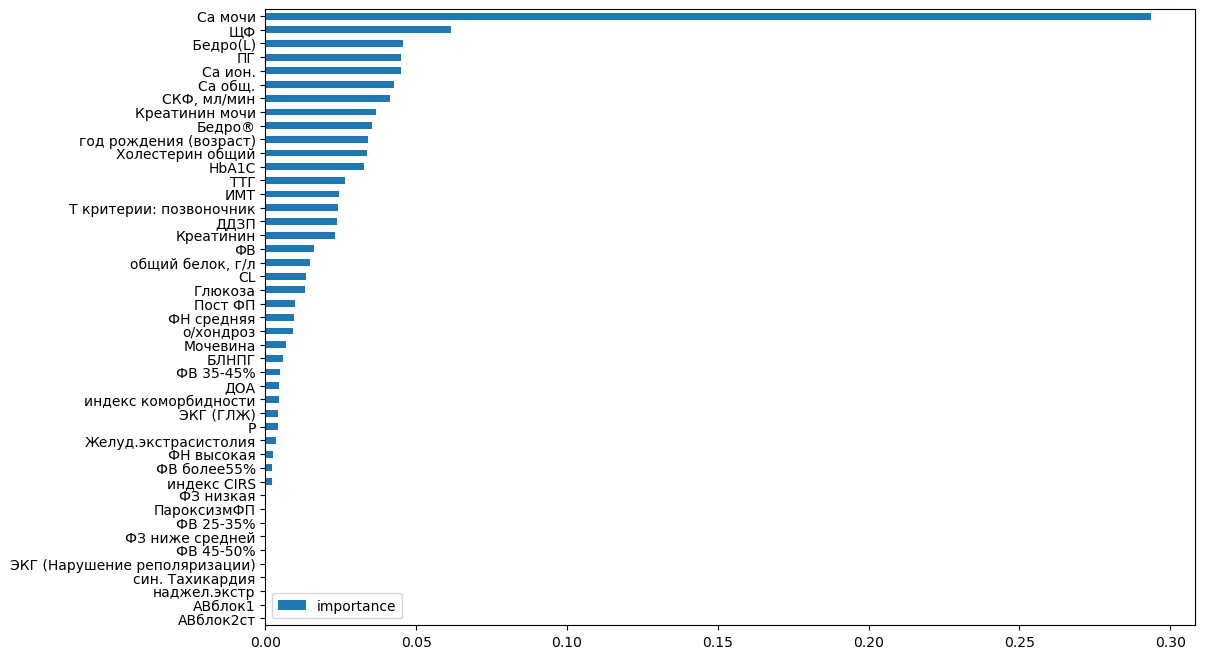

In [288]:
imp = pd.DataFrame(best_tree.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [289]:
a = np.argsort(best_tree.feature_importances_)[-10:]
X.iloc[:5,a]

,год рождения (возраст),Бедро®,Креатинин мочи,"СКФ, мл/мин",Са общ.,Са ион.,ПГ,Бедро(L),ЩФ,Са мочи
0,78.0,2.8,5.40,66.7,3.10,1.16,34.9,2.6,1.23,2.5
1,80.0,2.5,4.50,66.8,3.20,1.27,45.1,2.6,0.80,7.8
2,65.0,3.2,4.60,52.6,2.60,1.30,39.5,3.1,0.91,9.9
3,75.0,3.4,3.55,72.5,2.80,1.25,45.0,3.2,0.87,12.0
4,76.0,2.6,8.70,36.3,2.23,1.30,43.1,2.8,1.71,7.8


<AxesSubplot:>

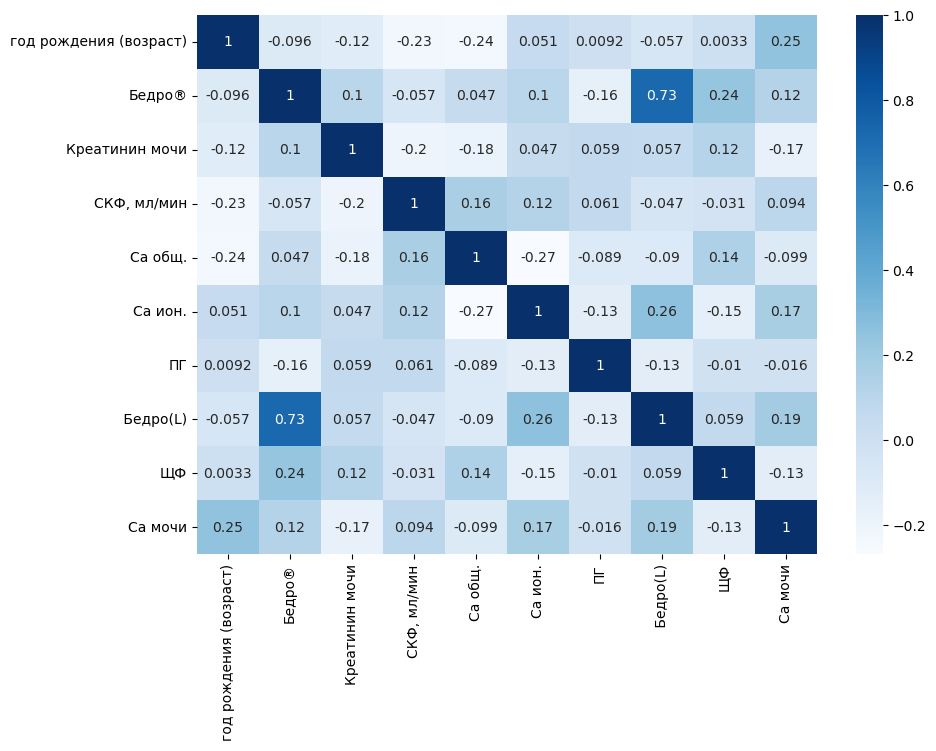

In [290]:
plt.figure(figsize=(10,7))
sns.heatmap(X.iloc[:,a].corr(), annot=True, cmap=plt.cm.Blues)

<AxesSubplot:>

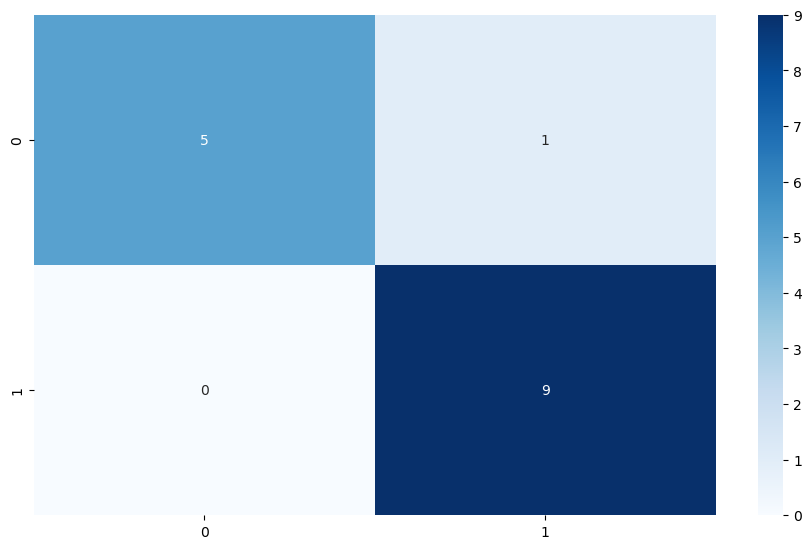

In [305]:
y_pred = best_tree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [310]:
print(
    f"Random forest AUC ROC score: {roc_auc_score(y_test, best_tree.predict_proba(X_test)[:, 1]):.2f}"
)
print(f"Random forest accuracy score: {accuracy_score(y_test, best_tree.predict(X_test)):.2f}")

Random forest AUC ROC score: 0.98
Random forest accuracy score: 0.93


### Вариант с использованием нейронной сети

In [311]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

In [315]:
display(X_train.head())
display(y_train.head())

,год рождения (возраст),ИМТ,ДДЗП,о/хондроз,ДОА,индекс коморбидности,индекс CIRS,"общий белок, г/л","СКФ, мл/мин",Глюкоза,...,ФВ более55%,ФВ 45-50%,ФВ 35-45%,ФВ 25-35%,ПароксизмФП,ФВ,ФЗ низкая,ФЗ ниже средней,ФН средняя,ФН высокая
30,77.0,31.2,1.0,1.0,1.0,8.0,9.0,82.0,87.0,6.6,...,1.0,0.0,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0
59,66.0,27.0,1.0,1.0,1.0,7.0,13.0,75.0,45.0,5.2,...,1.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,1.0
35,86.0,27.2,0.0,0.0,0.0,6.0,15.0,66.0,50.2,6.1,...,0.0,1.0,0.0,0.0,0.0,44.0,1.0,0.0,0.0,0.0
58,79.0,24.0,0.0,0.0,0.0,7.0,15.0,61.0,49.4,4.5,...,1.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,1.0,0.0
42,79.0,23.0,1.0,1.0,0.0,7.0,15.0,60.0,41.7,5.8,...,1.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,1.0,0.0


30    1
59    0
35    0
58    1
42    1
Name: y, dtype: int32

In [368]:
X = X.values
y = y.values

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [370]:
class BrokesDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


train_dataset = BrokesDataset(X_train, y_train)
test_dataset = BrokesDataset(X_test, y_test)

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [371]:
class BrokesClassifier(nn.Module):
    def __init__(self, input_size):
        super(BrokesClassifier, self).__init__()
        self.f_connected1 = nn.Linear(input_size, 20)
        self.relu = nn.ReLU()
        self.f_connected2 = nn.Linear(20, 20)
        self.out = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.f_connected1(x)
        x = self.relu(x)
        x = self.f_connected2(x)
        x = self.relu(x)
        x = self.out(x)
        x = self.sigmoid(x)
        return x


In [372]:
learning_rate = 0.001
num_epochs = 100


model = BrokesClassifier(input_size=len(train_dataset[0][0]))
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []


for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_total = 0
    train_correct = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        train_total += labels.size(0)
        train_correct += (outputs >= 0.5).squeeze().eq(labels).sum().item()
    
    train_loss /= train_total
    train_accuracy = train_correct / train_total
    print(f'Epoch {epoch}, accuracy = {train_accuracy}')

    model.eval()
    val_loss = 0.0
    val_total = 0
    val_correct = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted_labels = (outputs >= 0.5).squeeze().int()
            predictions.extend(predicted_labels.tolist())
            true_labels.extend(labels.tolist())
            loss = criterion(outputs, labels.unsqueeze(1))
            val_loss += loss.item() * inputs.size(0)
            val_total += labels.size(0)
            val_correct += (outputs >= 0.5).squeeze().eq(labels).sum().item()

    val_loss /= val_total
    val_accuracy = val_correct / val_total

    # Сохранение метрик обучения
    train_loss_history.append(train_loss)
    train_acc_history.append(train_accuracy)
    val_loss_history.append(val_loss)
    val_acc_history.append(val_accuracy)
    if epoch % 10 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, train loss: {train_loss:.4f}, train acc: {train_accuracy:.4f}, \
              test loss: {val_loss:.4f}, test acc: {val_accuracy:.4f}")




Epoch 0, accuracy = 0.6071428571428571
Epoch 1/100, train loss: 0.9206, train acc: 0.6071,               test loss: 0.7425, test acc: 0.6000
Epoch 1, accuracy = 0.44642857142857145
Epoch 2, accuracy = 0.39285714285714285
Epoch 3, accuracy = 0.6071428571428571
Epoch 4, accuracy = 0.6071428571428571
Epoch 5, accuracy = 0.6071428571428571
Epoch 6, accuracy = 0.6071428571428571
Epoch 7, accuracy = 0.6071428571428571
Epoch 8, accuracy = 0.6071428571428571
Epoch 9, accuracy = 0.6071428571428571
Epoch 10, accuracy = 0.6071428571428571
Epoch 11/100, train loss: 0.6718, train acc: 0.6071,               test loss: 0.7022, test acc: 0.6000
Epoch 11, accuracy = 0.6071428571428571
Epoch 12, accuracy = 0.625
Epoch 13, accuracy = 0.6071428571428571
Epoch 14, accuracy = 0.6071428571428571
Epoch 15, accuracy = 0.6071428571428571
Epoch 16, accuracy = 0.6071428571428571
Epoch 17, accuracy = 0.6071428571428571
Epoch 18, accuracy = 0.6071428571428571
Epoch 19, accuracy = 0.6071428571428571
Epoch 20, accura

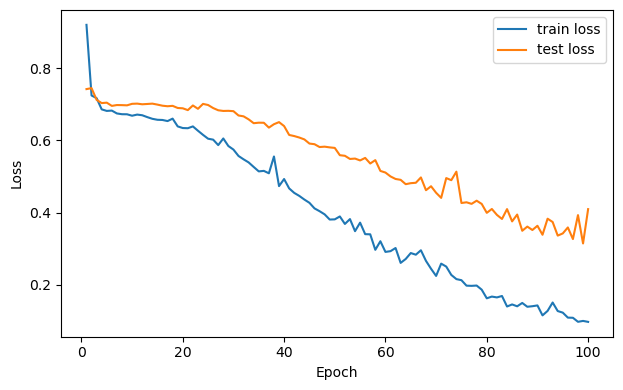

In [373]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, num_epochs + 1), train_loss_history, label='train loss')
plt.plot(np.arange(1, num_epochs + 1), val_loss_history, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



plt.tight_layout()
plt.show()

In [374]:
model(torch.tensor(X_test, dtype = torch.float32))

tensor([[0.8570],
        [0.0308],
        [0.9963],
        [0.3552],
        [0.9987],
        [0.0086],
        [0.0743],
        [0.6857],
        [0.7408],
        [0.7357],
        [0.5816],
        [0.9995],
        [0.1002],
        [0.0194],
        [0.1867]], grad_fn=<SigmoidBackward0>)

In [375]:
torch.tensor(model(torch.tensor(X_test, dtype = torch.float32)).round(), dtype = torch.int32).T[0]

C:\Users\297\AppData\Local\Temp\ipykernel_16672\3711979961.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(model(torch.tensor(X_test, dtype = torch.float32)).round(), dtype = torch.int32).T[0]


tensor([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=torch.int32)

In [376]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [377]:
for inputs, labels in test_loader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels.unsqueeze(1))
    loss.backward()
    optimizer.step()

    train_loss += loss.item() * inputs.size(0)
    train_total += labels.size(0)
    train_correct += (outputs >= 0.5).squeeze().eq(labels).sum().item()
    
train_loss /= train_total
train_accuracy = train_correct / train_total
print(f'accuracy = {train_accuracy}')

accuracy = 0.9577464788732394
